In [0]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
from tqdm import tqdm
import matplotlib.pyplot as plt

In [11]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [12]:
print(mnist.train.images.shape)
print(mnist.test.images.shape)
print(mnist.validation.images.shape)

(55000, 784)
(10000, 784)
(5000, 784)


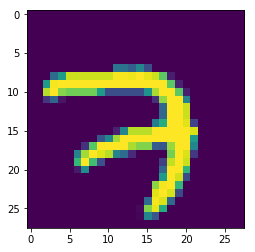

In [13]:
plt.imshow(mnist.train.images[0].reshape((28 ,28)))

In [0]:
train_x = mnist.train.images.reshape((-1,28,28,1))
train_y = mnist.train.labels
 
valid_x = mnist.validation.images.reshape((-1,28,28,1))
valid_y = mnist.validation.labels
 
test_x = mnist.test.images.reshape((-1,28,28,1))
test_y = mnist.test.labels

##  LeNet-5 Architectures:  
![](https://cdn-images-1.medium.com/max/2400/1*1TI1aGBZ4dybR6__DI9dzA.png)

In [0]:
batch_size = 128
epochs = 100

with tf.variable_scope("input"):
    x = tf.placeholder(shape=(None, 784), dtype=tf.float32, name="input_x")
    y = tf.placeholder("float", name="input_y")

In [0]:
def lenet(input):
    with tf.variable_scope("reshape"):
        input = tf.reshape(input, [-1, 28, 28, 1], name="reshape_input_x")

    with tf.variable_scope("conv_1"):
        weights1 = tf.Variable(tf.truncated_normal(shape=[5, 5, 1, 6], mean=0, stddev=0.1), name="weights1")
        bias1 = tf.Variable(tf.truncated_normal(shape=[6], mean=0, stddev=0.1), name="bias1")
        c1 = tf.nn.conv2d(input=input, filter=weights1, strides=[1,1,1,1], padding="SAME")+bias1
        s2 = tf.nn.max_pool(c1, ksize=(1,2,2,1),strides=[1,2,2,1], padding="VALID")

    with tf.variable_scope("conv_2"):
        weights2 = tf.Variable(tf.truncated_normal(shape=[5, 5, 6, 16], mean=0, stddev=0.1), name="weights2")
        bias2 = tf.Variable(tf.truncated_normal(shape=[16]))
        c3 = tf.nn.conv2d(input=s2, filter=weights2, strides=[1,1,1,1], padding="VALID")+bias2
        s4 = tf.nn.max_pool(c3, ksize=(1,2,2,1),strides=[1,2,2,1], padding="VALID")

    with tf.variable_scope("conv_3"):
        weights3 = tf.Variable(tf.truncated_normal(shape=[5,5,16,120], mean=0, stddev=0.1))
        bias3 = tf.Variable(tf.truncated_normal(shape=[120], mean=0, stddev=0.1))
        c5 = tf.nn.conv2d(input=s4, filter=weights3, strides=[1,1,1,1], padding="VALID")+bias3

    c5_shape_li = c5.get_shape().as_list()
    with tf.variable_scope("fc_1"):
        weights4 = tf.Variable(tf.truncated_normal(shape=[120, 84], mean=0, stddev=0.1))
        bias4 = tf.Variable(tf.truncated_normal(shape=[84], mean=0, stddev=0.1))
        with tf.variable_scope("flatten"):
            o5_flatten = tf.reshape(tensor=c5, shape=[-1, c5_shape_li[1] * c5_shape_li[2] * c5_shape_li[3]], name="flatten")
        f6 = tf.matmul(o5_flatten, weights4) + bias4

    with tf.variable_scope("output"):
        weights5 = tf.Variable(tf.truncated_normal(shape=[84, 10], mean=0, stddev=0.1))
        bias5 = tf.Variable(tf.truncated_normal(shape=[10], mean=0, stddev=0.1))
        output = tf.matmul(f6, weights5) + bias5

    return output

In [0]:
predict = lenet(x)

with tf.variable_scope("loss"):
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=predict, labels=y))

with tf.variable_scope("train"):
    optimizer = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(loss)
    correct_train = tf.equal(tf.math.argmax(predict, 1), tf.math.argmax(y, 1))
    accuracy_train = tf.reduce_mean(tf.cast(correct_train, "float"))

In [18]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in tqdm(range(10)):
        epoch_loss = 0
        for i in range(int(mnist.train.num_examples / batch_size)):
            epoch_x, epoch_y = mnist.train.next_batch(batch_size)
            _, c = sess.run([optimizer, loss], feed_dict={x: epoch_x, y: epoch_y})
            epoch_loss += c
        print("accuracy", sess.run(accuracy_train, feed_dict={x: mnist.test.images, y:mnist.test.labels}),
              'loss:', epoch_loss)

    correct = tf.equal(tf.argmax(predict, -1), tf.argmax(y, -1))

    accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
    print('Accuracy:', accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

 10%|█         | 1/10 [00:01<00:12,  1.35s/it]

accuracy 0.8861 loss: 557.2293778061867


 20%|██        | 2/10 [00:02<00:10,  1.26s/it]

accuracy 0.9247 loss: 152.76280938088894


 30%|███       | 3/10 [00:03<00:08,  1.19s/it]

accuracy 0.937 loss: 111.75006464868784


 40%|████      | 4/10 [00:04<00:06,  1.15s/it]

accuracy 0.9506 loss: 90.89418863505125


 50%|█████     | 5/10 [00:05<00:05,  1.11s/it]

accuracy 0.9578 loss: 76.3755045235157


 60%|██████    | 6/10 [00:06<00:04,  1.09s/it]

accuracy 0.9602 loss: 65.33972036838531


 70%|███████   | 7/10 [00:07<00:03,  1.07s/it]

accuracy 0.9677 loss: 57.52881586924195


 80%|████████  | 8/10 [00:08<00:02,  1.06s/it]

accuracy 0.9694 loss: 51.007932074368


 90%|█████████ | 9/10 [00:09<00:01,  1.05s/it]

accuracy 0.9746 loss: 46.25413919612765


100%|██████████| 10/10 [00:10<00:00,  1.05s/it]

accuracy 0.976 loss: 42.32568018883467
Accuracy: 0.976
